# Classification of magnetic phases using a convolutional neural network

### Machine learning phases of matter

Analysis based on a data set used in the paper *Machine learning phases of matter*, by Juan Carrasquilla & Roger G. Melko, published in *Nature Physics* in 2017: https://www.nature.com/articles/nphys4035

Nature Physics, **13**, 431–434 (2017)

### Data and task description

We consider a 2-dimensional square lattice of $n×n$ magnetic dipole moments (spins) that can be in one of two states (+1 or −1, Ising model). We assume that interactions between spins are of short ranged, i.e. each spin interacts only with its four neighbors. The probability to find a spin in one of the orientations is a function of temperature $T$ according to $ p∼ e^{−a/T} $, where $a=const$.

At very low temperatures $T→0$, neighboring spins have a very low probability of different orientations, so that a uniform overall state (ferromagnetic state) is adopted, characterized by +1 or −1. At very high temperatures $T \rightarrow \infty $, a paramagnetic phase with random spin alignment results, yielding 50% of +1 and 0 of −1 orientations. Below a critical temperature $0<T<T_c$, stable ferromagnetic domains emerge, with both orientations being equally probable in the absence of an external magnetic field. The spin-spin correlations diverge at $T_c$, whereas the correlation decays for $T>T_c$.

The data set for this task contains the $n×n$ dipole orientations on the lattice for different temperatures $T$. The task is to use a convolutional neural network for classifying the two magnetic phases.

### Import data

In [1]:
from tensorflow import keras
import numpy as np
callbacks = keras.callbacks
layers = keras.layers

print("keras", keras.__version__)

keras 2.4.0


In [2]:
path = r"C:\Users\Kepesidis\Desktop\Deep Learning for Physicists\tutorials\Tutorial 5\ising_data.npz"
f = np.load(path, allow_pickle=True)
n_train = 20000

x_train, x_test = f["C"][:n_train], f["C"][n_train:]
T_train, T_test = f["T"][:n_train], f["T"][n_train:]

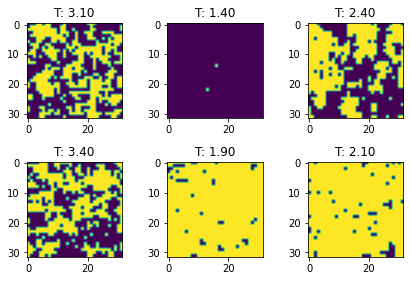

In [3]:
import matplotlib.pyplot as plt

for i,j in enumerate(np.random.choice(n_train, 6)):
    plt.subplot(2,3,i+1)
    image = x_train[j]
    plot = plt.imshow(image)
    plt.title("T: %.2f" % T_train[j])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'frequency')

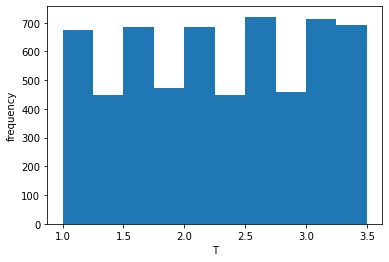

In [4]:
plt.hist(T_test)
plt.xlabel("T")
plt.ylabel("frequency")

#### Definition of magnetic phases in the training set

In [14]:
Tc = 2.27
y_train, y_test = T_train > Tc, T_test > Tc

### Tasks

- Construct a convolutional neural network (with Keras) for the classification of magnetic phases
- Evaluate the network's performance on the test set, by plotting the test accuracy as function of temperature
- Compare to the results obtained using a fully-connected network (Notebook 7)